In [ ]:
from google.colab import files
from IPython import display
from matplotlib.image import imread
from PIL import Image
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
uploaded=files.upload()

Saving picture.jpg to picture.jpg


Image shape:  (1280, 960)
nump_pc:  384
Shape of Z (centered data matrix * W): (1280, 384)
Reduction:  60.0


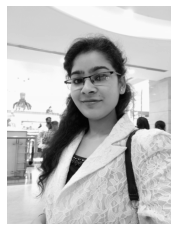

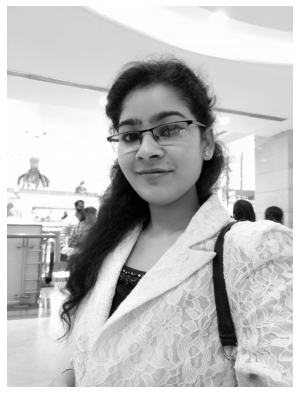

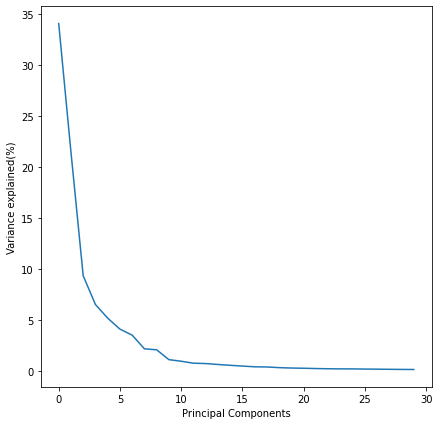

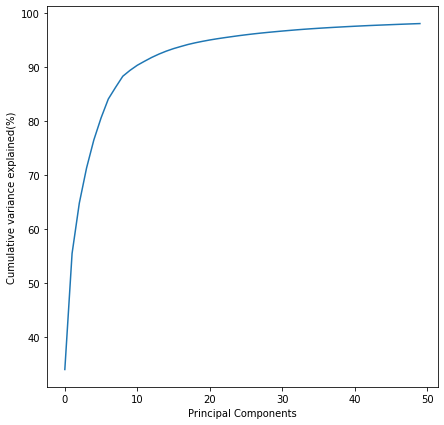

In [ ]:

def print_image_from_array(X):
    img = plt.imshow(X)
    img.set_cmap('gray')
    plt.rcParams['figure.figsize'] = [7, 7]
    plt.axis('off')
    plt.show()

def read_image(file_name):
    return io.imread(file_name, as_gray=True)

    
class PCA:
    def __init__(self, img):
        self.X = img.copy()
        print('Image shape: ', self.X.shape)
        self.u_X = np.mean(self.X, axis = 0)
        self.X_centred = self.X - self.u_X
        self.X_cov = np.cov(self.X, rowvar = False)
        self.eigen_vals, self.eigen_vecs = np.linalg.eigh(self.X_cov)
        
        idx = np.argsort(self.eigen_vals)[::-1]
        self.eigen_vals = self.eigen_vals[idx]
        self.eigen_vecs = self.eigen_vecs[:, idx]
        
        self.explained_variance_ratio = self.eigen_vals / np.sum(self.eigen_vals)
        self.explained_cumulative_variance_ratio = np.cumsum(self.eigen_vals) / np.sum(self.eigen_vals)

    #function to compress the image    
    def compress(self, percentage):
        total_num_pc = self.X.shape[1]
        num_pc = int(percentage / 100 * total_num_pc)
        print("nump_pc: ", num_pc)
        W = self.eigen_vecs[:, :num_pc]
        Z = np.dot(self.X_centred,W)
        print('Shape of Z (centered data matrix * W):', Z.shape)
        reduction = ((self.X.shape[0] * self.X.shape[1]) - (self.X.shape[0] * num_pc)) / (self.X.shape[0] * self.X.shape[1])
        print('Reduction: ', reduction * 100)
        X_new = np.dot(Z, W.T) + self.u_X
        return X_new.copy()
    
    #function to plot principal components vs variance explained
    def plot_explained_variance_ratio(self):
        plt.plot(self.explained_variance_ratio[:30] * 100)
        plt.ylabel('Variance explained(%)')
        plt.xlabel('Principal Components')
        plt.show()
        
    #function to plot principal components vs cumulative variance explained
    def plot_explained_cumulative_variance_ratio(self):
        plt.plot(self.explained_cumulative_variance_ratio[:50] * 100)
        plt.ylabel('Cumulative variance explained(%)')
        plt.xlabel('Principal Components')
        plt.show()
        
image = read_image('picture.jpg')
pca = PCA(image)
new_image = pca.compress(40)
print_image_from_array(new_image)
print_image_from_array(image)
pca.plot_explained_variance_ratio()
pca.plot_explained_cumulative_variance_ratio()